In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

In [3]:
stolen_vehicles = pd.read_csv("/Users/li/Downloads/stolenvehicles.csv")
stolen_vehicles.head(5)

,005502,Red,CFMOTO,X520,0,Unnamed: 5,2022-12-05,Wellington
0,02WRX,Black,Subaru,IMPREZA,2002,Saloon,2022-09-17,Canterbury
1,0NG8,Black,Ford,FALCON,1999,Saloon,2022-11-27,Central
2,1034W,Yellow,Briford,TRAILER,2001,Trailer,2022-11-15,Waitemata
3,104A3,Silver,Trailer,CT DIG 25,2021,Trailer - Heavy,2022-11-02,Waikato
4,108K8,Grey,Trailer,TANDEM,2021,Trailer,2022-12-15,Canterbury


In [4]:
header=['PlateNumber','Color','Brand','Model','YearMade','VehicleType','DateStolen','Location']
stolen_vehicles = pd.read_csv("/Users/li/Downloads/stolenvehicles.csv",names=header)
stolen_vehicles.head()

,PlateNumber,Color,Brand,Model,YearMade,VehicleType,DateStolen,Location
0,005502,Red,CFMOTO,X520,0,NaN,2022-12-05,Wellington
1,02WRX,Black,Subaru,IMPREZA,2002,Saloon,2022-09-17,Canterbury
2,0NG8,Black,Ford,FALCON,1999,Saloon,2022-11-27,Central
3,1034W,Yellow,Briford,TRAILER,2001,Trailer,2022-11-15,Waitemata
4,104A3,Silver,Trailer,CT DIG 25,2021,Trailer - Heavy,2022-11-02,Waikato


## Color

In [5]:
stolen_vehicles['Color'].value_counts()

Silver    1443
White     1062
Black      690
Blue       531
Grey       487
Red        386
Green      231
Gold        97
Yellow      58
Brown       52
Orange      39
Purple      27
Cream       22
Pink        11
Name: Color, dtype: int64

In [6]:
sum(stolen_vehicles['Color'].value_counts()[:3])/sum(stolen_vehicles['Color'].value_counts())

0.6220794392523364

### According to statistics, silver, white, and black vehicles are the top three victims among all vehicles stolen by thieves
<div class="alert alert-info">
These three colors account for more than 62%. It seems that thieves prefer colors that are more common on security grounds to avoid getting caught, or it might be a biased conclusion simply because these colors have the largest base numbers. More in-depth investigation will be conducted using all on-road vehicles data pulled from the NZ Transport Agency. .</div> 

In [7]:
#The New Zealand vehicle fleet open data provides a point-in-time ‘snapshot’ of 
#all vehicles currently registered in New Zealand43
#algorithmically cleaned
fleet = pd.read_csv("/Users/li/Downloads/Fleet-30112022.csv",dtype={"TRANSMISSION_TYPE": "string", "SYNTHETIC_GREENHOUSE_GAS": "string"})
fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687980 entries, 0 to 5687979
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ALTERNATIVE_MOTIVE_POWER     object 
 1   BASIC_COLOUR                 object 
 2   BODY_TYPE                    object 
 3   CC_RATING                    int64  
 4   CHASSIS7                     object 
 5   CLASS                        object 
 6   ENGINE_NUMBER                object 
 7   FIRST_NZ_REGISTRATION_YEAR   float64
 8   FIRST_NZ_REGISTRATION_MONTH  float64
 9   GROSS_VEHICLE_MASS           float64
 10  HEIGHT                       int64  
 11  IMPORT_STATUS                object 
 12  INDUSTRY_CLASS               object 
 13  INDUSTRY_MODEL_CODE          object 
 14  MAKE                         object 
 15  MODEL                        object 
 16  MOTIVE_POWER                 object 
 17  MVMA_MODEL_CODE              object 
 18  NUMBER_OF_AXLES              int64  
 19  

In [8]:
total_c=fleet['BASIC_COLOUR'].str.lower().value_counts().to_frame('count')
stolen_c=stolen_vehicles['Color'].str.lower().value_counts().to_frame('count')

merge=pd.merge(stolen_c, total_c, left_index=True, right_index=True)
merge['ratio']=merge['count_x']/merge['count_y']*100

In [9]:
Ratio=merge['ratio'].map(lambda x: "{:,.2%}".format(x))
Ratio

silver    11.59%
white      8.41%
black     10.48%
blue       7.91%
grey       7.49%
red        7.09%
green      9.14%
gold      11.21%
yellow     7.12%
brown      5.97%
orange     5.10%
purple     7.85%
cream      7.59%
pink      15.34%
Name: ratio, dtype: object

<div class="alert alert-info">
Based on the theft rate of each color in comparison to the total number of vehicles in the corresponding color group, <mark>Pink</mark> appears to be the favorite choice of thieves at a prominent rate of <mark>15.34%</mark>; followed by <mark>silver, gold, and black</mark>, which are all over <mark>10%</mark>;<mark>Orange</mark> proved to be the least popular color among thieves, accounting for only <mark>5.10%</mark> on the records. </div> 

### Day of Week

In [10]:
stolen_vehicles['Day'] = pd.to_datetime(stolen_vehicles['DateStolen']).dt.day_name()
stolen_vehicles['Day'].value_counts()

Monday       904
Tuesday      774
Wednesday    734
Thursday     732
Friday       729
Saturday     644
Sunday       637
Name: Day, dtype: int64

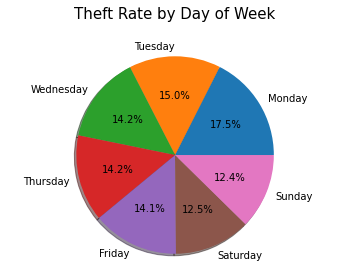

In [11]:
plt.pie(stolen_vehicles['Day'].value_counts(),labels = stolen_vehicles['Day'].value_counts().index.to_list(),shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Theft Rate by Day of Week",fontsize=15,y=1.1)
plt.show() 

In [12]:
stolen_vehicles['Weekends?']=pd.to_datetime(stolen_vehicles['DateStolen']).dt.weekday
stolen_vehicles.loc[stolen_vehicles['Weekends?']>=5,"Weekends?"]="Weekend"
stolen_vehicles.loc[stolen_vehicles['Weekends?']!="Weekend","Weekends?"]="Weekday"
Weekdays_rate=stolen_vehicles['Weekends?'].value_counts(normalize=True)[0]/5
print("Weekdays_rate","{:,.2%}".format(Weekdays_rate))
Weekends_rate=stolen_vehicles['Weekends?'].value_counts(normalize=True)[1]/2
print("Weekends_rate","{:,.2%}".format(Weekends_rate))

Weekdays_rate 15.03%
Weekends_rate 12.43%


### Thieves prefer weekdays and Mondays have the highest theft rate.
<div class="alert alert-info">
According to the data, <mark>cars are most likely to be stolen on Monday</mark> in New Zealand, accounting for <mark>17.54%</mark> of all data, which is two percentage points higher than the average. <mark>Sunday</mark> is the <mark>safest</mark> day, accounting for 12.36%. Therefore, New Zealanders should pay more attention when driving on Monday. Additionally, the average number of stolen cars per day on weekdays accounts for 15.03% of all data, while daily theft rate of weekends accounts for 12.43%, presenting a difference of more than two percentage points. This may be because people are more likely to commute to work by car during the week, resulting in more cars on the road and more opportunities for thieves.</div> 

## Trend

In [13]:
stolen_vehicles['month'] = pd.to_datetime(stolen_vehicles['DateStolen']).dt.month
stolen_vehicles['month'].value_counts(ascending=True)

6       33
7      662
8      678
9      778
10     852
11     953
12    1198
Name: month, dtype: int64

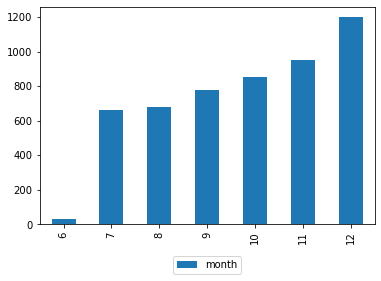

In [14]:
stolen_vehicles['month'].value_counts(ascending=True).plot(kind='bar')
plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.25))
plt.show()

In [15]:
#average number of vehicles stolen per day
mean = len(stolen_vehicles) / len(stolen_vehicles['DateStolen'].unique())
mean

28.318681318681318

### The number of stolen vehicles is increasing month over month, posing a security risk to the society 
<div class="alert alert-info">
The result above shows that from July to December in 2022, <mark>an upward trend</mark> is cleary demonstrated by the monthly data, reaching its peak in December with a month-on-month expansion rate of 25.7%. The growth rate compared to July is shocking, reaching a staggering 181% increase. On average, there are 28 stolen vehicles reported per day in New Zealand. The increasing prevalence of car theft in New Zealand indicates a security risk in society. The government should implement policies to strengthen penalties for car theft in order to protect people's property. In addition, New Zealanders should be vigilant about protecting their own vehicles by prioritizing car safety when traveling.</div> 

### VehicleType

In [16]:
stolen_vehicles['VehicleType'].value_counts()[:12]

Stationwagon       1113
Saloon              910
Hatchback           737
Trailer             718
Utility             572
Roadbike            302
Moped               198
Light Van           184
Trailer - Heavy      92
Boat Trailer         73
Caravan              53
Other Truck          37
Name: VehicleType, dtype: int64

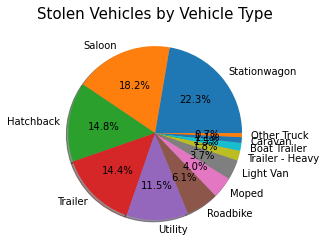

In [17]:
plt.pie(stolen_vehicles['VehicleType'].value_counts()[:12],labels = stolen_vehicles['VehicleType'].value_counts()[:12].index.to_list(),shadow=True,autopct='%1.1f%%')
plt.title("Stolen Vehicles by Vehicle Type",fontsize=15,y=1)
plt.show() 

### The station wagon model has become the favorite among thieves, accounting for 22.3% of all stolen vehicles
<div class="alert alert-info">
Of all the stolen cars, <mark>station wagons, saloons, hatchbacks, trailers, and utilities accounted for 81.2%</mark> of the total data. Among them, the station wagon model is the most popular choice of theives. It is suggested that car companies should consider increasing their investment in research and development of anti-theft features for station wagon models in order to address this issue</div> 

### YearMade

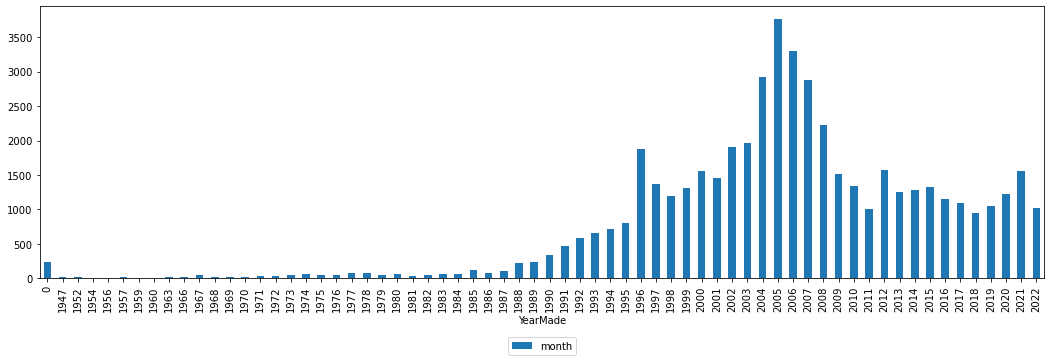

In [18]:
stolen_vehicles.groupby(["YearMade"]).sum().plot(kind='bar',figsize=(18,5))
plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3))
plt.show()

<div class="alert alert-info">
The graph above appears that the production years of stolen vehicles are primarily concentrated between 1995 and 2022. However, a significantly larger number of stolen vehicles were produced between 1995 and 2009 compared to those produced after 2009. It is worth considering whether this is due to the fact that there are more older vehicles in New Zealand or if thieves simply prefer stealing older vehicles.</div> 

In [19]:
#work on the theft rate of each year the cars been made in comparison to the total number 
#of vehicles in the corresponding year group

total_ym=fleet['VEHICLE_YEAR'].value_counts().to_frame('count')
stolen_ym=stolen_vehicles[stolen_vehicles["YearMade"]!=0]["YearMade"].value_counts().to_frame('count')

year=pd.merge(stolen_ym, total_ym, left_index=True, right_index=True)
year['theft_rate_by_yearmade']=year['count_x']/year['count_y']*100
year['theft_rate_by_yearmade'].sort_values(ascending=False).head(10)

1996    0.201328
2002    0.168321
1999    0.167329
1993    0.162747
1997    0.161944
2003    0.161554
2000    0.160557
1998    0.155110
1992    0.147471
2001    0.141674
Name: theft_rate_by_yearmade, dtype: float64

In [20]:
#theft_rate between 1996-2008
year[(year['theft_rate_by_yearmade'].index>=1996) & (year['theft_rate_by_yearmade'].index<2009)]['theft_rate_by_yearmade'].sum()

1.8921541451104675

In [21]:
#theft_rate from 2009
year[year['theft_rate_by_yearmade'].index>=2009]['theft_rate_by_yearmade'].sum()

0.8731866858956931

### Based on the result, now we can come to a conclusion that thieves tend to target older cars that produced after 1995 and  before 2009 .

### Location

In [22]:
stolen_vehicles["Location"].value_counts()

Canterbury                  890
Counties/Manukau            633
Auckland City               544
Waikato                     512
Waitemata                   491
Central                     468
Wellington                  435
Bay of Plenty               388
Northland                   337
Eastern                     228
Southern                    155
Tasman                       71
Not Specified (District)      2
Name: Location, dtype: int64

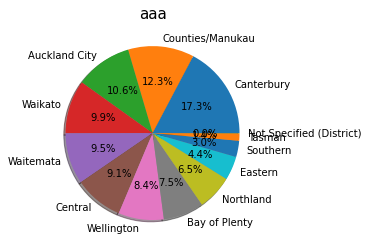

In [23]:
plt.pie(stolen_vehicles["Location"].value_counts(),labels = stolen_vehicles["Location"].value_counts().index.to_list(),shadow=True,autopct='%1.1f%%')
plt.title("aaa",fontsize=15,y=1)
plt.show() 

In [24]:
#replace ambiguous locations with the most relevant geographical areas for ploting
#Central: Auckland CBD, Southern: Queenstown(these two spots were pinned in Europe before clarification)
sv_location=stolen_vehicles["Location"].value_counts()[:-1].to_frame('num')
sv_location['Location']=['Canterbury', 'Counties/Manukau', 'Auckland', 'Waikato',
       'Waitemata', 'Auckland CBD', 'Wellington', 'Bay of Plenty', 'Northland',
       'Eastern', 'Queenstown', 'Tasman']
sv_location.set_index('Location',drop=True,inplace=True)

In [25]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="mapitout")
data = geolocator.geocode('NZ')
data

Location(New Zealand / Aotearoa, (-41.5000831, 172.8344077, 0.0))

In [26]:
import folium
from folium.features import DivIcon
map_of_sv = folium.Map(location=[-41.5000831, 172.8344077], zoom_start=13)

for i in sv_location.index:
    data = geolocator.geocode(i+',NZ')
    folium.Marker(location=[data.point.latitude , data.point.longitude], popup=i,icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,20),
        html=f'''<div style="font-size: 12pt; color : black">{sv_location.loc[i].num}</div>''')).add_to(map_of_sv)

bounds = [[-44.9552, 165], [-35, 180]]
map_of_sv.fit_bounds(bounds)
map_of_sv

<div class="alert alert-info">
There are no clear patterns found in the crime distribution map above. It is worth noting that the Northland has a higher number of cases compared to the South Island due to the fact that 75% of New Zealand's population resides in the North Island. While Canterbury may appear to have an unusually high number of cases, this can be explained by the fact that it is the largest region in the country by area.</div> 

Epilogue:I have observed that many of data analysis reports do not rely heavily on advanced machine learning techniques, but rather use simple numerical and statistical analysis methods. Despite this, the conclusions drawn from the analysis often align with practical knowledge, making the report valuable. As such, I have found it rewarding to attempt to analyze data using more straightforward methods and new approaches, rather than relying solely on machine learning techniques.